# Step 3: Data Cleaning & Feature Engineering (Modify Stage)

In [44]:
# Install the required packages
!pip install -q pycaret[full] imblearn

In [2]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv("https://drive.google.com/uc?export=download&id=1vRwN2C0oBgWd-Tnvrrcb0mKsy7wUXKfU")
df.columns = ["id", "gender", "age", "hypertension",	"heart_disease",
              "ever_married", "work_type", "residence_type", "avg_glucose_level",
              "bmi", "smoking_status", "stroke"]

# Assign data type to the columns
#df["gender"] = df["gender"].astype(pd.StringDtype())
#df["work_type"] = df["work_type"].astype(pd.StringDtype())
#df["residence_type"] = df["residence_type"].astype(pd.StringDtype())
#df["smoking_status"] = df["smoking_status"].astype(pd.StringDtype())
df["ever_married"] = df["ever_married"].map({"Yes": 1, "No": 0}).astype(int)
df["hypertension"] = df["hypertension"].astype(int)
df["heart_disease"] = df["heart_disease"].astype(int)


# drop id column
df = df.drop(columns=["id"])

In [3]:
# define categorical and numerical columns

numerical_var = ["age", "average_glucose_level", "bmi"]
categorical_var = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "smoking_status"]
target_var = ["stroke"]

In [4]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,1,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


### (i) One-hot encoding

In [5]:
data = df[['gender', 'age', 'hypertension', 'heart_disease',
           'ever_married', 'work_type', 'residence_type',	'avg_glucose_level',
           'bmi',	'smoking_status',	'stroke']].copy(deep=True)

df_encoded = pd.get_dummies(data, columns=['gender', 'smoking_status',
                                'work_type', 'residence_type'],
                              drop_first=True)

In [6]:
df_encoded

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban
0,67.0,0,1,1,228.69,36.6,1,True,False,True,False,False,False,True,False,False,True
1,61.0,0,0,1,202.21,NaN,1,False,False,False,True,False,False,False,True,False,False
2,80.0,0,1,1,105.92,32.5,1,True,False,False,True,False,False,True,False,False,False
3,49.0,0,0,1,171.23,34.4,1,False,False,False,False,True,False,True,False,False,True
4,79.0,1,0,1,174.12,24.0,1,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,83.75,NaN,0,False,False,False,True,False,False,True,False,False,True
5106,81.0,0,0,1,125.20,40.0,0,False,False,False,True,False,False,False,True,False,True
5107,35.0,0,0,1,82.99,30.6,0,False,False,False,True,False,False,False,True,False,False
5108,51.0,0,0,1,166.29,25.6,0,True,False,True,False,False,False,True,False,False,False


In [7]:
# we will drop `gender_Other` variable as it's has only 1 row
df_encoded = df_encoded.drop(columns=["gender_Other"])


### (ii) Train Test split

In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the dataset using stratification
X = df_encoded.drop(columns='stroke', axis=1)  # Features
y = df_encoded['stroke']  # Target

X_train, X_test, y_train, y_test = train_test_split(
          X, y, test_size=0.2, stratify=y, random_state=42)

# combine X_train and y_train data
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

### (iii) Missing Value Imputation for `bmi` column

- `bmi`

  - **Type of missing value**: MAR
  - **Explanation**: The missingness depends on observed variables like gender and age group, etc, and not on the value of the `bmi` itself
  - **Other observation**: 3% of the data is missing
  - **Approach**:
      - Implement mean imputation
      - Create missingness indicator variable named `bmi_missing`

In [9]:
# check missing values in `bmi` column

## Check missing values in the training set
print("\nMissing values of `bmi` column in the training set X_train:", X_train["bmi"].isnull().sum())

## Check missing values in the test set
print("\nMissing values of `bmi` column in the test set X_test:", X_test["bmi"].isnull().sum())


Missing values of `bmi` column in the training set X_train: 170

Missing values of `bmi` column in the test set X_test: 31


In [10]:
X_train["bmi"].fillna(X_train["bmi"].mean(), inplace=True)
X_test["bmi"].fillna(X_test["bmi"].mean(), inplace=True)


In [11]:
# check missing values in `bmi` column

## Check missing values in the training set
print("\nMissing values of `bmi` column in the training set X_train:", X_train["bmi"].isnull().sum())

## Check missing values in the test set
print("\nMissing values of `bmi` column in the test set X_test:", X_test["bmi"].isnull().sum())


Missing values of `bmi` column in the training set X_train: 0

Missing values of `bmi` column in the test set X_test: 0


### （iv） SMOTE re-sampling

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# Then create and apply the resampling pipeline only to training data
over = SMOTE(sampling_strategy=1)
under = RandomUnderSampler(sampling_strategy=0.1)

steps = [('under', under), ('over', over)]
pipeline = Pipeline(steps=steps)

# Apply the resampling
X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)
# Convert y_train_resampled to Series with the same name as original y
X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns)
y_train_res = pd.Series(y_train_res, name=y.name)


print("Original training set distribution:", Counter(y_train))
print("Resampled training set distribution:", Counter(y_train_res))
print("Test set distribution (unchanged):", Counter(y_test))

Original training set distribution: Counter({0: 3889, 1: 199})
Resampled training set distribution: Counter({0: 1990, 1: 1990})
Test set distribution (unchanged): Counter({0: 972, 1: 50})


In [13]:
# combine back the smote re-sampling dataset
train_data_res = pd.concat([X_train_res, y_train_res], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Step 4: Modeling

### (i) Building a decision tree model as benchmark

In [14]:
from pycaret.classification import *

dt_experiment = setup(data=train_data_res,
                      target="stroke",
                      test_data=test_data,
                      session_id=24, # seed config to ensure experiment's reproducility
                      preprocess=False, # since we've manually do the feature engineer
                      #max_encoding_ohe = 25,
                      normalize=True,
                      normalize_method = 'zscore', # apply zscore for numeric feature
                      fix_imbalance=False,
                      # fix_imbalance_method='SMOTE',
                      experiment_name = "dt_stroke_classification",
                      index=False)
dt_model = create_model('dt', fold=5)

type(dt_model)

,Description,Value
0,Session id,24
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(5002, 16)"
4,Transformed data shape,"(5002, 16)"
5,Transformed train set shape,"(3980, 16)"
6,Transformed test set shape,"(1022, 16)"
7,Numeric features,6


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8103,0.8103,0.7161,0.8824,0.7906,0.6206,0.6319
1,0.9033,0.9033,0.9322,0.8812,0.9060,0.8065,0.8079
2,0.8894,0.8894,0.9347,0.8571,0.8942,0.7789,0.7821
3,0.9158,0.9158,0.9598,0.8822,0.9194,0.8317,0.8349
4,0.9045,0.9045,0.9648,0.8610,0.9100,0.8090,0.8150
Mean,0.8847,0.8847,0.9015,0.8728,0.8840,0.7693,0.7744
Std,0.0381,0.0381,0.0936,0.0113,0.0474,0.0762,0.0732


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

sklearn.tree._classes.DecisionTreeClassifier

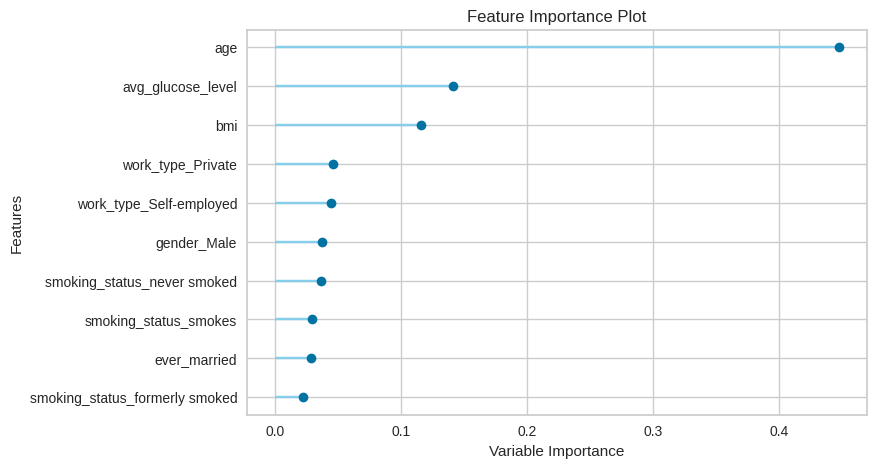

In [15]:
plot_model(dt_model,"feature")

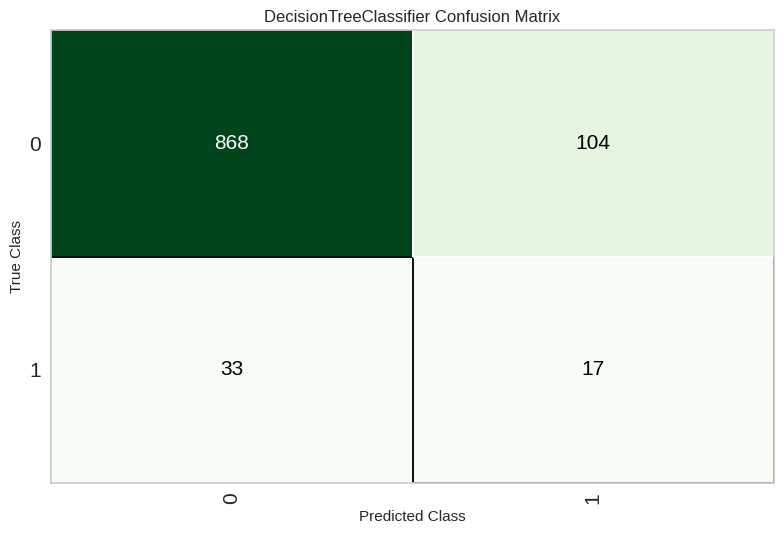

In [16]:
plot_model(dt_model,"confusion_matrix")

In [17]:
# Plot Decision Tree
plot_model(dt_model, plot="parameter")
print(dt_model)

,Parameters
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=24, splitter='best')


In [18]:
# Get the evaluation metrics of the test set in the decision tree model
predictions = predict_model(dt_model, data=test_data)
holdout_score = pull() # Pulls test set's evaluation metrics
type(holdout_score)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8659,0.6165,0.3400,0.1405,0.1988,0.1392,0.1556


pandas.core.frame.DataFrame

### (ii) Bagging for decision tree model

In [19]:
# create boosting ensemble models with just one line of code.
bagging_dt = ensemble_model(dt_model, method="Bagging")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7337,0.8477,0.5226,0.9043,0.6624,0.4673,0.5155
1,0.9472,0.9909,0.9849,0.9159,0.9492,0.8945,0.8970
2,0.9573,0.9941,0.9799,0.9375,0.9582,0.9146,0.9155
3,0.9472,0.9887,0.9397,0.9541,0.9468,0.8945,0.8946
4,0.9598,0.9784,0.9950,0.9296,0.9612,0.9196,0.9219
5,0.9472,0.9797,0.9548,0.9406,0.9476,0.8945,0.8946
6,0.9523,0.9833,0.9749,0.9327,0.9533,0.9045,0.9054
7,0.9648,0.9861,0.9950,0.9384,0.9659,0.9296,0.9313
8,0.9246,0.9802,0.9598,0.8967,0.9272,0.8492,0.8514


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### (iii) Boosting for decision tree model

In [20]:
boosting = ensemble_model(dt_model, method= 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7136,0.7136,0.5276,0.8400,0.6481,0.4271,0.4601
1,0.9146,0.9146,0.9648,0.8767,0.9187,0.8291,0.8334
2,0.9146,0.9146,0.9548,0.8837,0.9179,0.8291,0.8318
3,0.9422,0.9422,0.9698,0.9190,0.9438,0.8844,0.8858
4,0.8970,0.8970,0.9648,0.8496,0.9035,0.7940,0.8014
5,0.8869,0.8869,0.8995,0.8775,0.8883,0.7739,0.7741
6,0.8744,0.8744,0.9045,0.8531,0.8780,0.7487,0.7501
7,0.9246,0.9246,0.9648,0.8930,0.9275,0.8492,0.8520
8,0.8920,0.8920,0.9447,0.8545,0.8974,0.7839,0.7883


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## (iv) AutoML

In [21]:
# Use these splits in PyCaret
from pycaret.classification import *
automl_experiment = setup(data=train_data_res,
                          target="stroke",
                          test_data=test_data,
                          session_id=24, # seed config to ensure experiment's reproducility
                          preprocess=False, # since we've manually do the feature engineer
                          #max_encoding_ohe = 25, # one hot encoding
                          normalize=True,
                          normalize_method = 'zscore', # apply zscore for numeric feature
                          # fix_imbalance=False, # fix imbalance via smote
                          # fix_imbalance_method='SMOTE',
                          # experiment_name = "automl_stroke_classification",
                          fold=10,
                          index=False)

# get a list of top 3 models
best_model = compare_models(sort="F1")

# generate logs
get_logs()

,Description,Value
0,Session id,24
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(5002, 16)"
4,Transformed data shape,"(5002, 16)"
5,Transformed train set shape,"(3980, 16)"
6,Transformed test set shape,"(1022, 16)"
7,Numeric features,6


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9369,0.9849,0.9372,0.9345,0.9289,0.8739,0.8806,0.4100
xgboost,Extreme Gradient Boosting,0.9334,0.9822,0.9367,0.9262,0.9231,0.8668,0.8742,0.2610
et,Extra Trees Classifier,0.9334,0.9814,0.9266,0.9351,0.9219,0.8668,0.8740,0.4280
catboost,CatBoost Classifier,0.9299,0.9810,0.9332,0.9241,0.9203,0.8598,0.8674,4.0690
lightgbm,Light Gradient Boosting Machine,0.9289,0.9828,0.9317,0.9228,0.9176,0.8578,0.8660,0.3260
dt,Decision Tree Classifier,0.8894,0.8894,0.9106,0.8728,0.8868,0.7789,0.7851,0.0330
knn,K Neighbors Classifier,0.8726,0.9377,0.9764,0.8094,0.8848,0.7452,0.7626,0.0610
gbc,Gradient Boosting Classifier,0.8897,0.9666,0.9015,0.8751,0.8799,0.7794,0.7867,0.8130
ada,Ada Boost Classifier,0.8606,0.9484,0.8879,0.8376,0.8548,0.7211,0.7295,0.3400
lr,Logistic Regression,0.8568,0.9350,0.8583,0.8511,0.8477,0.7136,0.7190,0.2910


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

,run_id,experiment_id,status,artifact_uri,start_time,end_time


In [22]:
# get the pipeline
best_model_pipeline = get_config("pipeline")
best_model_pipeline

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+')))],
         verbose=False)

In [23]:
# hyperparameter tuning
tuned_best_model = tune_model(best_model, fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7035,0.8671,0.5025,0.8403,0.6289,0.4070,0.4445
1,0.9296,0.9820,0.9899,0.8834,0.9336,0.8593,0.8656
2,0.9372,0.9943,0.9899,0.8955,0.9403,0.8744,0.8793
3,0.9246,0.9852,0.9548,0.9005,0.9268,0.8492,0.8508
4,0.9221,0.9790,0.9849,0.8750,0.9267,0.8442,0.8510
5,0.9296,0.9818,0.9749,0.8940,0.9327,0.8593,0.8628
6,0.9271,0.9817,0.9849,0.8829,0.9311,0.8543,0.8600
7,0.9472,0.9899,0.9849,0.9159,0.9492,0.8945,0.8970
8,0.9196,0.9765,0.9698,0.8813,0.9234,0.8392,0.8435


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [24]:
# making prediction
predictions = predict_model(tuned_best_model, data = test_data)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8992,0.7691,0.2400,0.1558,0.1890,0.1378,0.1415


,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,gender_Male,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,stroke,prediction_label,prediction_score
0,63.0,0,0,1,78.230003,34.799999,True,False,True,False,False,True,False,False,False,0,0,0.90
1,43.0,0,0,1,86.669998,33.299999,False,False,True,False,False,True,False,False,True,0,0,1.00
2,23.0,0,0,0,126.669998,28.700001,False,False,False,True,False,True,False,False,True,0,0,0.98
3,21.0,0,0,0,208.169998,24.900000,False,False,True,False,False,True,False,False,True,0,0,0.97
4,67.0,0,0,1,113.339996,26.299999,True,True,False,False,False,True,False,False,False,0,1,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,82.0,0,0,0,82.209999,26.000000,False,False,True,False,False,False,True,False,True,0,0,0.51
1018,34.0,0,0,0,120.059998,33.000000,False,False,True,False,False,False,False,False,False,0,0,1.00
1019,50.0,0,0,1,92.150002,20.799999,False,False,True,False,False,False,False,False,True,0,0,0.97
1020,15.0,0,0,0,62.570000,32.299999,True,False,True,False,False,False,False,True,False,0,0,0.88


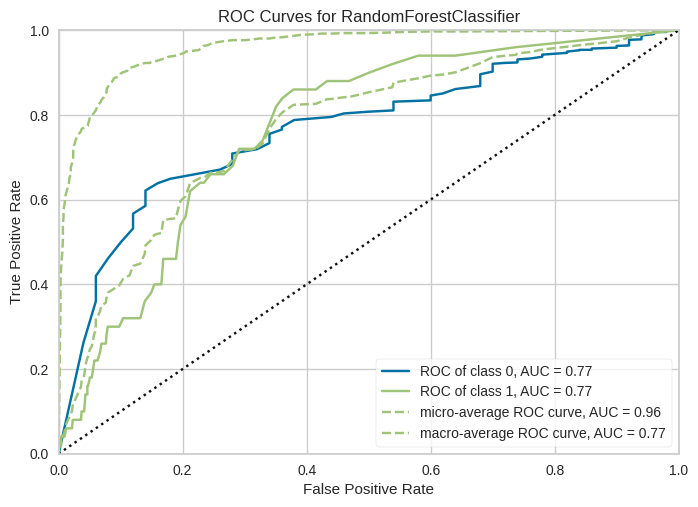

In [25]:
plot_model(tuned_best_model, plot="auc")

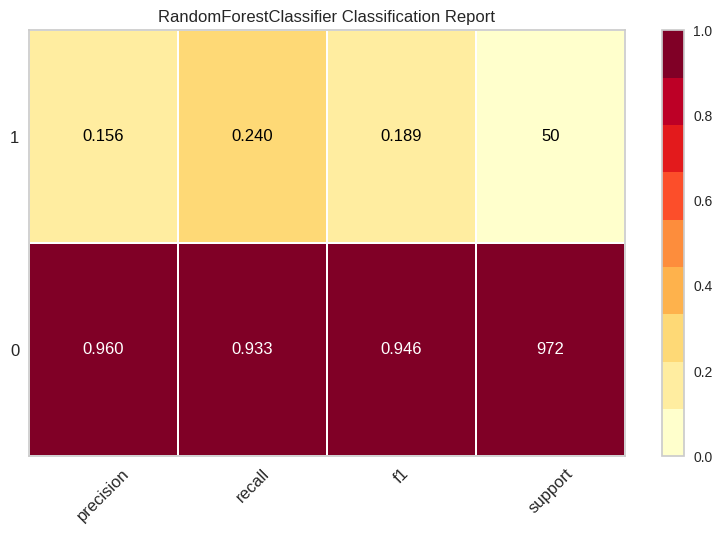

In [26]:
plot_model(tuned_best_model, plot='class_report')

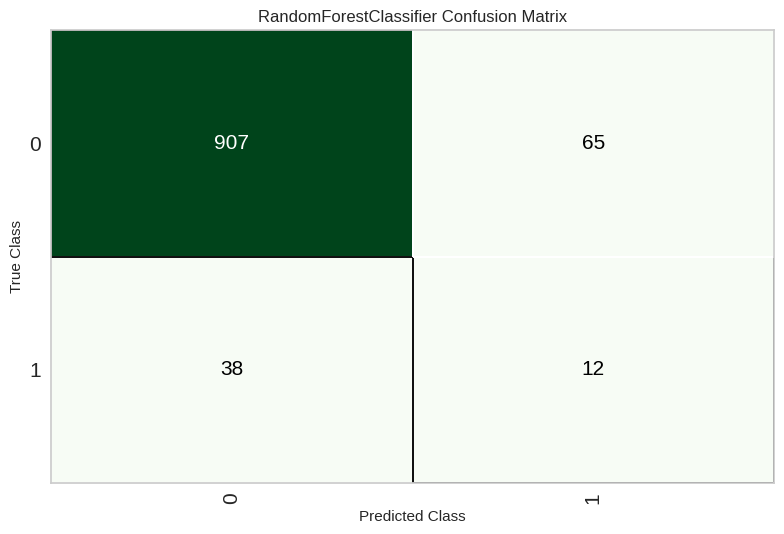

In [29]:
plot_model(tuned_best_model, plot="confusion_matrix")

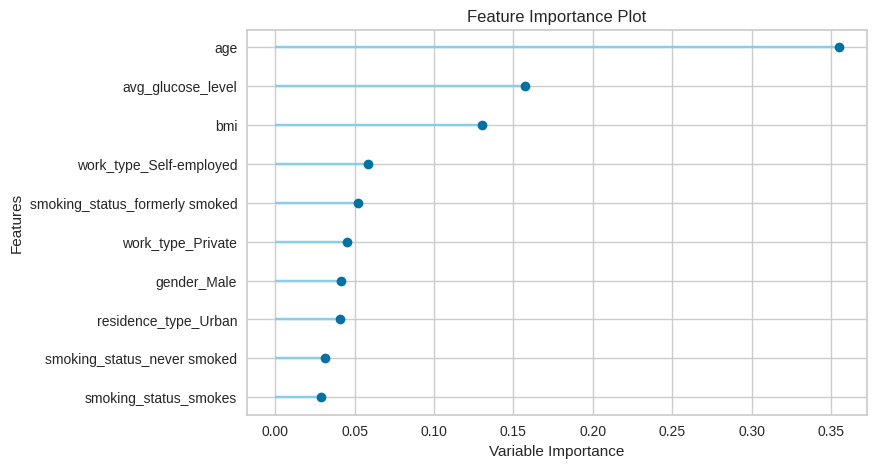

In [31]:
plot_model(tuned_best_model, plot='feature')

In [33]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

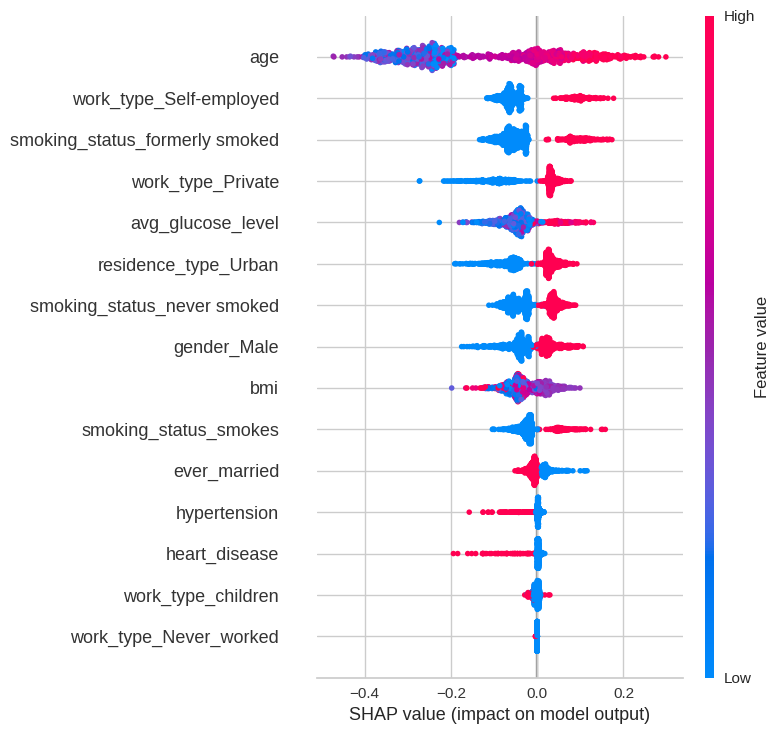

In [34]:
interpret_model(tuned_best_model)

In [35]:
predictions.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'gender_Male',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'residence_type_Urban',
       'stroke', 'prediction_label', 'prediction_score'],
      dtype='object')

# Save model

In [36]:
# save model
save_model(tuned_best_model, 'tuned_best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_samples_leaf=1, min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         monotonic_cst=None, n_estimators=100,
                                         n_jobs=-1, oob_score=False,
                                        

## Load model

In [37]:
# load model
tuned_best_model = load_model(model_name='tuned_best_model')

Transformation Pipeline and Model Successfully Loaded


In [38]:
tuned_best_model

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=24, verbose=0,
                                        warm_start=False))],
         verbose=False)

## Computing Environment

In [42]:
!pip install -q watermark

In [43]:
%load_ext watermark

%watermark --iversions

# date
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
pycaret : 3.3.2
pandas  : 2.1.4
sklearn : 1.4.2
imblearn: 0.0

Last updated: Fri Jan 17 2025 07:38:35UTC



## References

- Running Low on Time? Use PyCaret to Build your Machine Learning Model in Seconds https://www.analyticsvidhya.com/blog/2020/05/pycaret-machine-learning-model-seconds/
- Pycaret Documentation: https://pycaret.gitbook.io/docs/get-started/functions/others
- Easy MLOps with PyCaret + MLflow: https://towardsdatascience.com/easy-mlops-with-pycaret-mlflow-7fbcbf1e38c6
- Comparing the Five Most Popular EDA Tools https://towardsdatascience.com/comparing-five-most-popular-eda-tools-dccdef05aa4c